In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape



(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

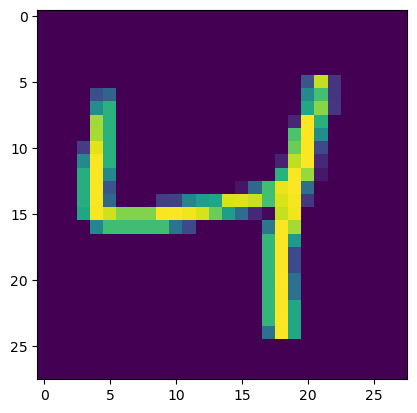

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,epochs=35,validation_split=0.2)

Epoch 1/35
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9220 - val_loss: 0.1319 - val_accuracy: 0.9602
Epoch 2/35
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1146 - accuracy: 0.9659 - val_loss: 0.1159 - val_accuracy: 0.9659
Epoch 3/35
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0775 - accuracy: 0.9767 - val_loss: 0.1007 - val_accuracy: 0.9704
Epoch 4/35
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.1071 - val_accuracy: 0.9689
Epoch 5/35
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.1060 - val_accuracy: 0.9702
Epoch 6/35
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 0.1032 - val_accuracy: 0.9737
Epoch 7/35
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.0993 - val_accuracy:

In [12]:
y_prob=model.predict(X_test)
y_prob.argmax(axis=1)

313/313 [==============================] - 0s 864us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
y_pre=y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.9761

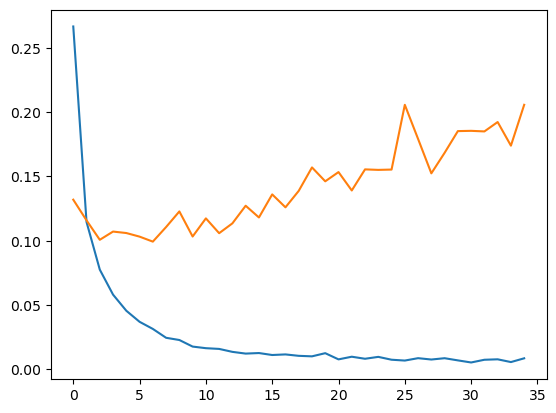

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

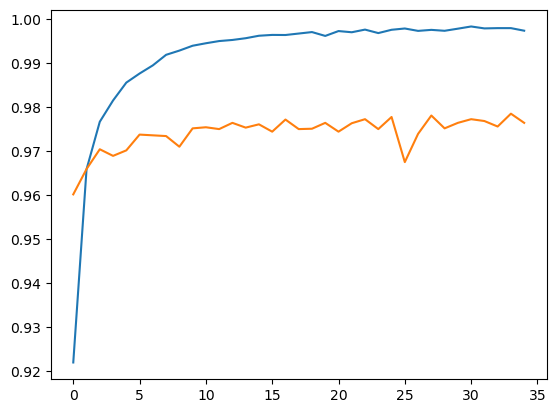

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

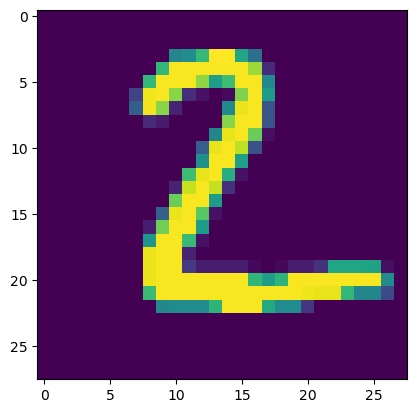

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([2], dtype=int64)